<a href="https://colab.research.google.com/github/mannixp/CHIST/blob/main/PDF_Construction_using_extruded_mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update --fix-missing

try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

**Part 2 - Computing the PDF**

**A) Theory**

Having constructed the CDF $F(y)$ we now turn to constructing its PDF which must remain positive and integrate to one. While strictly speaking the PDF is the derivative of the CDF, the CDF obtained in **Part 1** is discontinuous and therefore a classical derivative can only be defined within each element $\Omega_e$. At the element facets $\partial \Omega_e$ there is a jump in the CDF, and as a consequence $F(y)$ has neither a classical nor a weak derivative at these points. Instead a distributional derivative must be used (cf. [Ern, A., Guermond, JL. (2021)](https://doi.org/10.1007/978-3-030-56341-7_4)). This distinction leads us to define the PDF as the distribution
\begin{equation}
f(\varphi) = \int_{\Omega_Y} \varphi(y) dF(y),
\end{equation}
where $\varphi$ is an appropriate test function. Although the PDF cannot be expressed as a function, Lebesgue's decomposition theorem (cf. [Rudin, W. (1987)](https://perso.telecom-paristech.fr/decreuse/_downloads/c22155fef582344beb326c1f44f437d2/rudin.pdf)) (and the finite dimensional setting of this problem) allows this distribution to be written as a sum of two continuous linear functionals
\begin{equation}
f(\varphi) = \langle \varphi , f_c \rangle_{V_{f_c}} + \langle \varphi , f_s \rangle_{V_{f_s}},
\end{equation}
over the Hilbert spaces $V_{f_c}$ and $V_{f_s}$ associated with the absolutely continuous Lebesgue measure $\nu_c$ within the elements and the singular continuous Dirac measure $\nu_s$ at the element facets. This is useful because although we cannot calculate the functional form of the PDF we can nevertheless compute its Riesz-representation in terms of $f_c(y)$ and $f_s(y)$.

To recover $f_c$, the Riesz representor of $f(\varphi)$ within each element, we define the function space $V_{f_c}$ to be
\begin{equation*}
    f_c \in V_{f_c} \subset L^2(\Omega_Y), \quad \text{where} \quad f_c:\Omega_Y \to \mathbb{R}^+ \quad \text{s.t.} \; \int_{\Omega_Y} |f_c| dy < \infty,
\end{equation*}
followed by a set of basis functions $V_{f_c} = span\{\varphi_i(y)\}$ such that
\begin{equation*}
    f_c(y) = \sum_i f^s_i \varphi_i(y).
\end{equation*}
We then define the projection in each element $e$ as
\begin{equation*}
    \int_{e} \varphi_e f_c(y) \; dy = \int_{e} \varphi_e \partial_y F(y) \; dy, \quad \text{where} \quad \varphi_e \in V_{e},
\end{equation*}
which upon integrating over all cells $\sum_e \int_e \cdot \; dy = \int_{\Omega_Y} \cdot \; dy$ and accounting for the fact that facets in $L^2(\Omega_Y)$ have measure zero gives
\begin{equation*}
    \int_{\Omega_Y} v f_c(y) \; dy = \int_{\Omega_Y} v \partial_y F(y) \; dy, \quad \text{where} \quad v \in V_{f_c}.
\end{equation*}

To recover $f_s$, the Riesz representor of $f(\varphi)$ at the element facets, we first consider that at each facet $y_e$ there is a jump in the CDF given by $[[F]]_e = F_+ - F_-$, where the subscripts $+/-$ are used to denote the value of $F(y_e)$ approaching from the right/left. Restricting ourselves to a single facet $\partial e$ we define the distributional derivative by
\begin{equation*}
\int_{\partial e} \varphi \partial_y F \; dy = -\int_{\partial e} (\partial_y \varphi)  F \; dy,
\end{equation*}
where $\varphi \in C_0(\Omega_Y)$ is an appropriate test function (cf. [Ern, A., Guermond, JL. (2021)](https://doi.org/10.1007/978-3-030-56341-7_4)). Evaluating the previous integral from the left and the right of an arbitrary facet for $\epsilon > 0$
\begin{equation*}
\int_{\partial e} \varphi \partial_y F \; dy = \int_{y_e - \epsilon}^{y_e} ( \partial_y \varphi) F \; dy - \int_{y_e}^{y_e + \epsilon} ( \partial_y \varphi) F \; dy,
\end{equation*}
and then taking the limit $\epsilon \to 0$ we obtain
\begin{equation*}
\int_{\partial e} \varphi \partial_y F \; dy = F_- \int_{y_e - \epsilon}^{y_e} \partial_y \varphi \; dy - F_+ \int_{y_e}^{y_e + \epsilon} \partial_y \varphi \; dy = - [[F]]_e \varphi(y_e),
\end{equation*}
which we can rewrite in terms of the delta distribution (or Dirac measure) $\delta(y)$ as
\begin{equation*}
\int_{\Gamma} \varphi \partial_y F \; dy = - \sum_e \int_{\partial e} \varphi(y) [[F(y)]] \delta(y - y_e) dy,
\end{equation*}
where $\Gamma = \cup \; \partial \Omega_e$ is the set of all element facets. By the Riesz representation theorem it then follows that as
\begin{equation}
\langle \varphi , f_s \rangle_{V_{f_s}} \coloneqq - \sum_e \int_{\partial e} \varphi(y) [[F(y)]] \delta(y - y_e) dy,
\end{equation}
we can use $f_s \in V_{f_s}$ (associated with the singular continuous measure $\nu_s$ at the element facets) to represent this integral. Choosing the space of piecewise continuous functions $V_{f_c}$ to be
\begin{equation*}
    f_s \in V_{f_s} \subset L^2(\Omega_Y), \quad \text{where} \quad f_s:\Omega_Y \to \mathbb{R}^+ \quad \text{s.t.} \; \int_{\Omega_Y} |f_s| dy < \infty,
\end{equation*}
followed by a set of basis functions $V_{f_s} = span\{\varphi_i(y)\}$ such that
\begin{equation*}
    f_s(y) = \sum_i f^s_i \varphi_i(y).
\end{equation*}
We then define the projection over the set of element facets $\Gamma = \cup \; \partial \Omega_e$ as
\begin{equation*}
    \int_{\Gamma} v f_s(y) \; d \nu_s(y) = - \int_{\Gamma} v [[F(y)]] d \nu_s(y), \quad \text{where} \quad v \in V_{f_s}.
\end{equation*}
and
\begin{equation*}
    \nu_s(y) = 
    \begin{cases} 
    1 \quad y \in \Gamma, \\
    0 \quad \text{otherwise}.
    \end{cases}
\end{equation*}

As we now demonstrate numerically, defining the PDF $f(\varphi)$ in terms of distribution provides a mathematically consistent formulation which allows us to ensure that the projection of derivative of the CDF does not loose mass, while applying the Riesz representation theorem allows us to visualize the PDF in terms of how $f_s, f_c$ acts on functions.

**B) Numerical implementation**

To demonstrate our method of recovering $f_c$ and $f_s$ we will make use of the function 
\begin{equation}
Y(x_1) = \begin{cases} 0 \quad x_1 < 0, \\ x \quad x_1 \geq 0, \end{cases} 
\end{equation}
where $x_1 \in [-1,1]$. This function is useful because its CDF contains a step and therefore its corresponding PDF will contain a Dirac distribution. To simplify the presentation we use the *NumDF* library (imported below) which implements the methods used in **Part 1**. 

In [1]:
from numdf import Ptp
import numpy as np
from firedrake import *

We begin by creating an instance of the *Ptp* class by specify the physical domain $\Omega_X$, the domain of the CDF $\Omega_Y$ and a number of elements. As justified in Part1 a discontinuous piecewise linear 'DG1' function space is selected by default for the CDF.

In [2]:
# Specify the domain sizes and number of elements
ptp = Ptp(Omega_X = {'x1': (-1, 1)}, Omega_Y = {'Y': (-1, 1)}, n_elements=10)

We then specify our function $Y(x_1)$ in terms of the coordinates of the domain and generate its CDF by calling the fit method.

In [3]:
# Extract the coordinates
x1 = ptp.x_coords()
Y = conditional(ge(x1, 0), x1, 0)
density = ptp.fit(Y=Y, quadrature_degree=200)

Using the density object we can then plot the CDF, which contains a step at $y=0$.

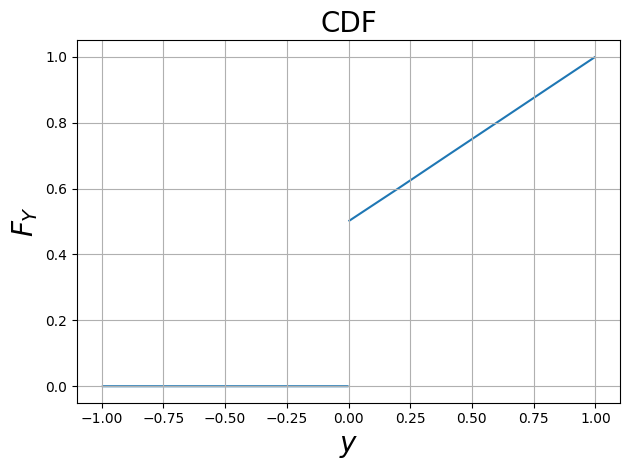

In [4]:
density.plot('CDF')

We first compute the projection of $\partial_y F(y)$ into $L^2(\Omega_Y)$ by specifying a discontinuous piecewise constant function space $V_{f_c}$ for $f_c(y)$ also known as 'DG0'. This choice naturally follows from the fact that $F(y)$ lives in 'DG1' and so its derivative should live in the lower order space 'DG0'.

In [5]:
def compute_fc_pdf(F):
    """Compute f_c(y) as the derivative of CDF F(y) within the elements."""

    # Grab the mesh associated with the CDF
    mesh = F.function_space().mesh()

    # Define a function space for the PDF
    V_fc = FunctionSpace(mesh=mesh,family="DG",degree=0)

    u = TrialFunction(V_fc)
    v = TestFunction(V_fc)

    # Define the variational form
    a = inner(u,v)*dx
    L = inner(F.dx(0),v)*dx

    # Solve for fc
    fc = Function(V_fc)
    solve(a == L, fc)
    
    return fc

To realise the Riesz representor $f_s$ associated with the jump discontinuities at each facet, we can project the distribution into the space of continuous functions 'CG1' whose basis
\begin{equation}
\varphi_i(y_j) = \delta_{ij}, \quad \delta_{ij} = \begin{cases} 1 \quad i = j, \\ 0 \quad i \neq j, \end{cases}
\end{equation}
if restricted to the set of cell facets naturally represents our measure. To compute $[[F]]_e$ we make use of the $\texttt{jump}$ operator (part of the UFL form language) which evaluates the difference between the restrictions of the given expression on the positive and negative sides of the facet. The restriction to the cell facets is implemented by making use of the interior and exterior measures $\texttt{dS}$ and $\texttt{ds}$. At the exterior facets we impose the boundary condition $F(y_{min}) = 0, \; F(y_{max}) = 1$ in order to evaluate the jump and finally the $\texttt{avg}$ operator used below is also required when using $\texttt{dS}, \texttt{ds}$.

In [6]:
def compute_fs_pdf(F):
    """Compute fs the riesz representor of the distributional derivative of CDF F(y) at the element facets."""

    # Grab the mesh associated with the CDF
    mesh = F.function_space().mesh()
    
    # Define a function space for the test function
    V_fs = FunctionSpace(mesh=mesh, family="CG", degree=1)

    u = TrialFunction(V_fs)
    v = TestFunction(V_fs)

    # Define the variational form for the:
    #      interior facets                 exterior facets
    a = inner(avg(u),avg(v))*dS  +          inner(u,v)*ds
    L = -jump(F)*avg(v)*dS       -  ( (F-1)*v*ds(2) - (F-0)*v*ds(1) )

    # Solve for fs
    fs = Function(V_fs)
    solve(a == L, fs)

    return fs

Having defined these two functions we then pass the CDF computed in order to recover the distribution $f(\varphi)$ in terms of $f_c$ and $f_s$.

In [7]:
# Compute fc within the elements
fc = compute_fc_pdf(density.cdf)

# Compute fs at the element boundaries
fs = compute_fs_pdf(density.cdf)

Below we plot $f(\varphi)$ in terms of $f_c$ (solid line) and $f_s$ (vertical dashed blue line)

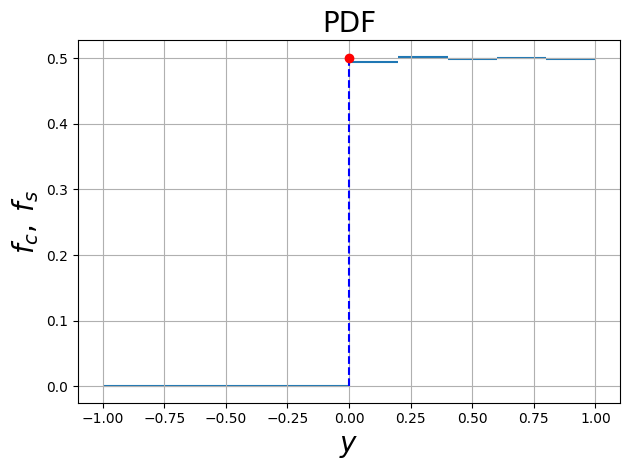

In [8]:
import matplotlib.pyplot as plt
from firedrake.pyplot import plot

# Plot the piecewise constant component
plot(fc, num_sample_points=50)

# Plot the measure mu(y)
m_y = fs.function_space().mesh()
loc = m_y.coordinates.dat.data[:]
jump = fs.dat.data[:]

y = np.linspace(0,1,50)
for j_i,y_i in zip(jump,loc): 
    plt.plot(y_i*np.ones(50),j_i*y,'b--')
    if abs(j_i) > 1e-03: plt.plot(y_i,j_i,'ro')

# Label the plot
plt.title(r'PDF',fontsize=20)
plt.ylabel(r'$f_c, \; f_s$',fontsize=20)
plt.xlabel(r'$y$',fontsize=20)
plt.tight_layout()
plt.grid()
plt.show()

Finally to check that this projection has conserved mass we integrate the distribution $f(\varphi=1)$ below

In [9]:
int_f = assemble(fc*dx)  +  assemble(fs*ds + avg(fs)*dS)

print('f(φ=1) = <1,f_c> + <1, f_s> = %e' % int_f)

f(φ=1) = <1,f_c> + <1, f_s> = 1.000000e+00


In **Part 1** a discontinuous piecewise linear function space 'DG1' for $F(y)$ was justified by the need to maintain a non-decreasing and right-continuous function, which can be achieved by applying a slope limiter more easily for 'DG1' than for other higher order elements. Although this would be also guaranteed by choosing the space of piece-wise constant discontinuous functions 'DG0', the cell integral and the boundary terms in the previous equation would cancel, meaning that an additional approximation would need to be introduced in order to recover the PDF at these points. By choosing 'DG1' this issue is avoided and as evidenced by this notebook, 'DG1' also provides a convenient means for recovering the PDF (which may include a Dirac distribution) in a consistent fashion. 